# Load Data from Google Drive

#### Connecting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Imports:

In [ ]:
import numpy as np 
import pandas as pd
import re
import spacy
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import string

## Read Data from Google Drive (Arnav):

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning/Group 17/out-13950.csv')
df.head()

,Reviews,Ratings
0,I went to Yang's restaurant in Clontarf with m...,5.0
1,It’s nice to see that some things don’t change...,5.0
2,We had dinner two weeks ago and we were very d...,1.0
3,Can’t rate this authentic Chinese enough. Flaw...,5.0
4,Still as good as ever. This is a fantastic Chi...,4.0


## Read Data from Google Drive (Honglin):

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/4th Year/Machine Learning/Group Project/out-13950.csv')
df.head()

# Process Data

## Loading the dataset:

In [ ]:
df.describe()

,Ratings
count,13950.000000
mean,4.554122
std,0.953227
min,1.000000
25%,5.000000
50%,5.000000
75%,5.000000
max,5.000000


In [ ]:
df.isnull().mean()

Reviews    0.0
Ratings    0.0
dtype: float64

## Getting the range of data in ratings:

In [ ]:
df['Ratings'].unique()

array([5., 1., 4., 3., 2.])

In [ ]:
df['Ratings'].value_counts(normalize=True)

5.0    0.754337
4.0    0.141219
3.0    0.043441
1.0    0.034767
2.0    0.026237
Name: Ratings, dtype: float64

## Generating the word cloud:

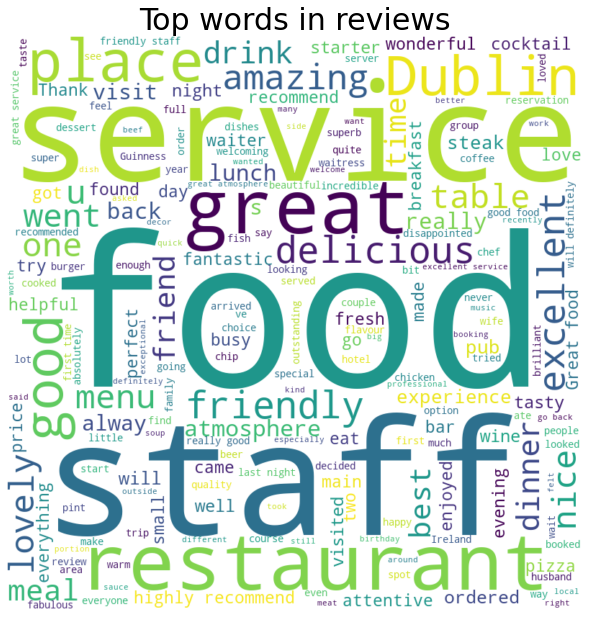

In [ ]:
def wordCloud_generator(data, title=None):
    wordcloud = WordCloud(width = 800, height = 800,
                          background_color ='white',
                          min_font_size = 10
                         ).generate(" ".join(data.values))                      
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(title,fontsize=30)
    plt.show()
wordCloud_generator(df['Reviews'], title="Top words in reviews")

## Making a copy to preserve the original values:

In [ ]:
X = df['Reviews'].copy()
y = df['Ratings'].copy()

## appostrophe dictionary:

In [ ]:
appostrophe_vocabulary = {
"aren't" : "are not",
"can't" : "cannot",
"couldn't" : "could not",
"didn't" : "did not",
"doesn't" : "does not",
"don't" : "do not",
"hadn't" : "had not",
"hasn't" : "has not",
"haven't" : "have not",
"he'd" : "he would",
"he'll" : "he will",
"he's" : "he is",
"i'd" : "I would",
"i'd" : "I had",
"i'll" : "I will",
"i'm" : "I am",
"isn't" : "is not",
"it's" : "it is",
"it'll":"it will",
"i've" : "I have",
"let's" : "let us",
"mightn't" : "might not",
"mustn't" : "must not",
"shan't" : "shall not",
"she'd" : "she would",
"she'll" : "she will",
"she's" : "she is",
"shouldn't" : "should not",
"that's" : "that is",
"there's" : "there is",
"they'd" : "they would",
"they'll" : "they will",
"they're" : "they are",
"they've" : "they have",
"we'd" : "we would",
"we're" : "we are",
"weren't" : "were not",
"we've" : "we have",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who'd" : "who would",
"who'll" : "who will",
"who're" : "who are",
"who's" : "who is",
"who've" : "who have",
"won't" : "will not",
"wouldn't" : "would not",
"you'd" : "you would",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have",
"'re": " are",
"wasn't": "was not",
"we'll":" will",
"didn't": "did not"
}

## Preprocessing the data:

In [ ]:
import nltk
nlp = spacy.load('en_core_web_sm',disable=['parser','ner'])
nltk.download('stopwords')
from zipfile import ZipFile
file_loc = '/root/nltk_data/corpora/stopwords.zip'
with ZipFile(file_loc, 'r') as z:
  z.extractall('/root/nltk_data/corpora/')
stopword_list = stopwords.words('english')

def pre_processing_of_data(reviews):
  clean_reviews=[]
  for review in reviews:
    clean=review.lower()
    clean=clean.replace("."," . ")
    clean=" ".join(word.strip(string.punctuation) for word in clean.split())
    clean_words=clean.split()
    clean_words=[word for word in clean_words if word.isalpha()]
    split_words=[appostrophe_vocabulary[word] if word in appostrophe_vocabulary else word for word in clean_words]
    split_words=[word for word in split_words if word not in stopword_list]
    reformed_words=" ".join(split_words)
    document=nlp(reformed_words)
    reformed_words=" ".join([token.lemma_ for token in document]) #lemmatization
    clean_reviews.append(reformed_words)
  data_cleaned=pd.DataFrame()
  data_cleaned['clean_reviews']=clean_reviews
  return data_cleaned['clean_reviews']
X_cleaned = pre_processing_of_data(X)
X_cleaned.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    go restaurant clontarf family recently owner s...
1    nice see thing change decor remain food fantas...
2    dinner two week ago disappoint food poor quali...
3    rate authentic chinese enough flawless food fr...
4    still good ever fantastic chinese restaurant l...
Name: clean_reviews, dtype: object

## Encoding Ratings into one hot vector:

In [ ]:
encoding = {1: 0, 2: 1, 3: 2, 4: 3, 5: 4}
labels = ['1', '2', '3', '4', '5']
           
# y = df['Ratings'].copy()
y.replace(encoding, inplace=True)
y = to_categorical(y,5)

# Sequential Model

## Creating the training and testing data:

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y, stratify=y, random_state=42,test_size=0.2)

## Creating a vocabulary for keras:

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
max_length = max([len(x) for x in X_train])
vocabulary_size = len(tokenizer.word_index)+1 #add 1 to account for unknown word
print("Vocabulary size: {}".format(vocabulary_size))
print("Max length of sentence: {}".format(max_length))
X_train = pad_sequences(X_train, max_length ,padding='post') #added padding to ensure the size of the input and output are same



Vocabulary size: 10170
Max length of sentence: 309


## Creating a sequential model:

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout
from tensorflow.keras.layers import Bidirectional,Embedding,Flatten
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint


num_classes = 5
sequential_model = Sequential()
sequential_model.add(Embedding(vocabulary_size,32,input_length=X_train.shape[1]))
sequential_model.add(Bidirectional(LSTM(250,return_sequences=True)))
sequential_model.add(Dropout(0.2))
sequential_model.add(Flatten())
sequential_model.add(Dense(128,activation='relu'))
sequential_model.add(Dropout(0.2))
sequential_model.add(Dense(64,activation='relu'))
sequential_model.add(Dense(32,activation='relu'))
sequential_model.add(Dropout(0.2))
sequential_model.add(Dense(16,activation='relu'))
sequential_model.add(Dense(num_classes,activation='softmax'))
sequential_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
callbacks = [EarlyStopping(monitor='val_loss', patience=5),
             ModelCheckpoint('../model/model.h5', save_best_only=True, 
                             save_weights_only=False)]
sequential_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 309, 32)           325440    
                                                                 
 bidirectional_4 (Bidirectio  (None, 309, 500)         566000    
 nal)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 309, 500)          0         
                                                                 
 flatten_4 (Flatten)         (None, 154500)            0         
                                                                 
 dense_20 (Dense)            (None, 128)               19776128  
                                                                 
 dropout_13 (Dropout)        (None, 128)               0         
                                                      

## Fitting the model:

Can further reduce overfitting by adding dropout layers.

In [ ]:
history = sequential_model.fit(X_train, y_train, validation_split=0.11, 
                    epochs=15, batch_size=32, verbose=1,
                    callbacks=callbacks)

Epoch 1/15
311/311 [==============================] - 786s 3s/step - loss: 0.7782 - accuracy: 0.7451 - val_loss: 0.6475 - val_accuracy: 0.7606
Epoch 2/15
311/311 [==============================] - 697s 2s/step - loss: 0.5794 - accuracy: 0.7743 - val_loss: 0.6447 - val_accuracy: 0.7614
Epoch 3/15
311/311 [==============================] - 662s 2s/step - loss: 0.4953 - accuracy: 0.7999 - val_loss: 0.6824 - val_accuracy: 0.7370
Epoch 4/15
311/311 [==============================] - 763s 2s/step - loss: 0.4098 - accuracy: 0.8316 - val_loss: 0.7798 - val_accuracy: 0.7353
Epoch 5/15
311/311 [==============================] - 781s 3s/step - loss: 0.3370 - accuracy: 0.8615 - val_loss: 0.9307 - val_accuracy: 0.6783
Epoch 6/15
311/311 [==============================] - 718s 2s/step - loss: 0.2772 - accuracy: 0.8909 - val_loss: 1.0493 - val_accuracy: 0.7492
Epoch 7/15
311/311 [==============================] - 663s 2s/step - loss: 0.2274 - accuracy: 0.9104 - val_loss: 1.0698 - val_accuracy: 0.7410

## Plotting the results:

Text(0.5, 1.0, 'Training and Validation accuracy')

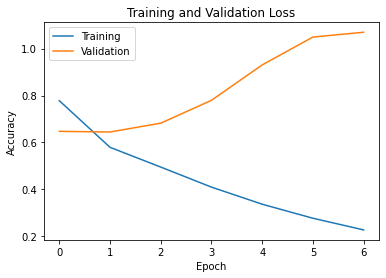

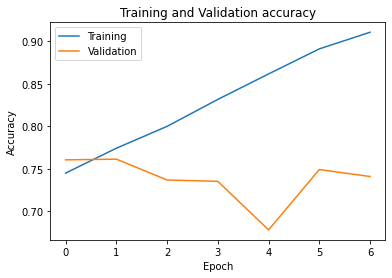

In [155]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.figure()

plt.plot(history.history['accuracy'],label='Training')
plt.plot(history.history['val_accuracy'],label='Validation')
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title('Training and Validation accuracy')

## Making predictions:

In [ ]:
X_test_tokenized = tokenizer.texts_to_sequences(X_test)
X_test_tokenized = pad_sequences(X_test_tokenized, max_length ,padding='post')
pred = np.argmax(sequential_model.predict(X_test_tokenized), axis=-1)
pred = to_categorical(pred,5)
# pred

88/88 [==============================] - 47s 528ms/step


removing the hot encoded vector:

In [ ]:
import numpy as np
rounded_labels=np.argmax(X_test_tokenized, axis=1)
rounded_labels

array([21, 12, 20, ...,  9,  9,  0])

## Get accuracy score and classification report:

In [ ]:
from sklearn.metrics import classification_report,accuracy_score
print(f'TestAccuracy: {accuracy_score(pred, y_test)}')
print(classification_report(y_test, pred, target_names=labels))

TestAccuracy: 0.7430107526881721
              precision    recall  f1-score   support

           1       0.64      0.29      0.40        97
           2       0.25      0.41      0.31        73
           3       0.26      0.27      0.27       121
           4       0.34      0.28      0.31       394
           5       0.86      0.89      0.87      2105

   micro avg       0.74      0.74      0.74      2790
   macro avg       0.47      0.43      0.43      2790
weighted avg       0.74      0.74      0.74      2790
 samples avg       0.74      0.74      0.74      2790



## Generating word cloud for reviews with rating == 5

(-0.5, 399.5, 199.5, -0.5)

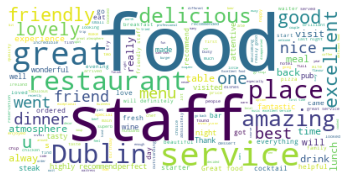

In [ ]:
df5=df[df.Ratings==5]
review_text_highest = ''
for line in df5.Reviews:
    review_text_highest += line + " "
wordcloud_max_rating = WordCloud(background_color="white").generate(review_text_highest)
plt.imshow(wordcloud_max_rating)
plt.axis("off")

## Generating word cloud for reviews with rating == 1

(-0.5, 399.5, 199.5, -0.5)

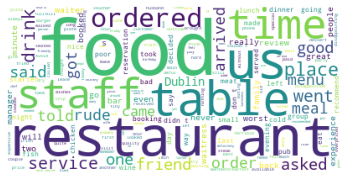

In [ ]:
df1 = df[df.Ratings == 1]
review_text_min = ''
for line in df1.Reviews:
    review_text_min += line + " "
wordcloud_min_rating = WordCloud(background_color="white").generate(review_text_min)
plt.imshow(wordcloud_min_rating)
plt.axis("off")

# Other Models

## Import Lasso, Ridge, CountVectorizer, MSE, math, statistics:

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
import math
import statistics

## Lasso and Ridge Regression:



In [ ]:
x = df['Reviews']
y = df['Ratings']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2022)
vectorizer_model = CountVectorizer(ngram_range = (1, 2), min_df=10)

X_train = vectorizer_model.fit_transform(x_train)
X_test = vectorizer_model.fit_transform(x_test)
vectorizer_model.fit(x)
X_train = vectorizer_model.transform(x_train)
X_test = vectorizer_model.transform(x_test)

X_train.toarray()
X_test.toarray()
Y_train = np.array(y_train)
Y_test = np.array(y_test)

Lasso

In [ ]:
def lasso_regression_model(alphas):
  lasso_labels = ['Alpha', 'Training RMSE', 'Coef Norm1', 'Coef Sum', 'Test RMSE']
  result=[]
  for alpha in alphas:
    result_list=[]
    lasso_model=Lasso(alpha)
    lasso_model.fit(X_train,Y_train)
    
    Y_test_pred=lasso_model.predict(X_test)
    mse_test=mean_squared_error(Y_test,Y_test_pred)
    rmse_test=math.sqrt(mse_test)

    Y_train_pred=lasso_model.predict(X_train)
    mse_train=mean_squared_error(Y_train,Y_train_pred)
    rmse_train=math.sqrt(mse_train)
    complexity_norm1=np.linalg.norm(lasso_model.coef_,ord=1)
    complexity_sum=np.sum(np.abs(lasso_model.coef_))

    print(f'Alpha: {alpha}')
    print(f'Train RMSE: {rmse_train}')
    print(f'Coefficients of Norm1 Complexity: {complexity_norm1}')
    print(f'Sum of Coefficients of Complexity: {complexity_sum}')
    print(f'Test RMSE: {rmse_test}\n')
    result_list=[alpha, rmse_train, complexity_norm1, complexity_sum, rmse_test]
    result.append(result_list)
  df_lassos=pd.DataFrame(result,columns=lasso_labels)
  return df_lassos

alphas = [0.0001, 0.001, 0.01, 0.1]
df_lasso=lasso_regression_model(alphas)

Alpha: 0.0001
Train RMSE: 0.38555867471967503
Coefficients of Norm1 Complexity: 583.650256709029
Sum of Coefficients of Complexity: 583.650256709029
Test RMSE: 0.8219702344289035

Alpha: 0.001
Train RMSE: 0.6569618664863636
Coefficients of Norm1 Complexity: 48.02394510734982
Sum of Coefficients of Complexity: 48.02394510734982
Test RMSE: 0.7402389007178193

Alpha: 0.01
Train RMSE: 0.8166390558936223
Coefficients of Norm1 Complexity: 4.664010364922347
Sum of Coefficients of Complexity: 4.664010364922347
Test RMSE: 0.8616419735162372

Alpha: 0.1
Train RMSE: 0.9394280883611887
Coefficients of Norm1 Complexity: 0.04557462063433614
Sum of Coefficients of Complexity: 0.04557462063433614
Test RMSE: 0.9805743596820564



In [ ]:
# Regenerate the best performing model:
lasso_best = Lasso(0.001)
lasso_best.fit(X_train, Y_train)
df_lasso_features = pd.DataFrame(data = {'Coefficient':list(lasso_best.coef_),'Feature_Name':vectorizer.get_feature_names()})
df_lasso_features['Coefficient_Magnitude'] = abs(df_lasso_features['Coefficient'])
df_lasso_features.sort_values(by='Coefficient_Magnitude', ascending=False).head(10)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Coefficient,Feature_Name,Coefficient_Magnitude
10342,-1.177288,worst,1.177288
7097,-1.046972,rude,1.046972
6571,-0.828471,poor,0.828471
2515,-0.771026,disappointing,0.771026
1432,-0.714822,bland,0.714822
6300,-0.704059,overpriced,0.704059
8064,-0.698265,tasteless,0.698265
6926,-0.678376,refused,0.678376
9368,-0.644252,very disappointed,0.644252
8110,-0.628030,terrible,0.628030


Ridge

In [ ]:
def ridge_regression_model(alphas):
  ridge_labels = ['Alpha', 'Training RMSE', 'Coef Norm1', 'Coef Sum', 'Test RMSE']
  result=[]
  for alpha in alphas:
    result_list=[]
    ridge_model=Ridge(alpha)
    ridge_model.fit(X_train,Y_train)
    
    Y_test_pred=ridge_model.predict(X_test)
    mse_test=mean_squared_error(Y_test,Y_test_pred)
    rmse_test=math.sqrt(mse_test)

    Y_train_pred=ridge_model.predict(X_train)
    mse_train=mean_squared_error(Y_train,Y_train_pred)
    rmse_train=math.sqrt(mse_train)
    complexity_norm1=np.linalg.norm(ridge_model.coef_,ord=1)
    complexity_sum=np.sum(np.abs(ridge_model.coef_))

    print(f'Alpha: {alpha}')
    print(f'Train RMSE: {rmse_train}')
    print(f'Coefficients of Norm1 Complexity: {complexity_norm1}')
    print(f'Sum of Coefficients of Complexity: {complexity_sum}')
    print(f'Test RMSE: {rmse_test}\n')
    result_list=[alpha, rmse_train, complexity_norm1, complexity_sum, rmse_test]
    result.append(result_list)
  df_ridges=pd.DataFrame(result,columns=ridge_labels)
  return df_ridges

alphas = [0.0001, 0.001, 0.01, 0.1]
df_ridge=ridge_regression_model(alphas)

Alpha: 0.0001
Train RMSE: 0.12412254097490032
Coefficients of Norm1 Complexity: 6399.979421992019
Sum of Coefficients of Complexity: 6399.979421992019
Test RMSE: 2.6629275756461395

Alpha: 0.001
Train RMSE: 0.12457899319101728
Coefficients of Norm1 Complexity: 6185.579522113088
Sum of Coefficients of Complexity: 6185.579522113088
Test RMSE: 2.584994872757877

Alpha: 0.01
Train RMSE: 0.130488462762954
Coefficients of Norm1 Complexity: 5014.070363445464
Sum of Coefficients of Complexity: 5014.070363445464
Test RMSE: 2.1513618520647926

Alpha: 0.1
Train RMSE: 0.1628376409152819
Coefficients of Norm1 Complexity: 3071.5996107429473
Sum of Coefficients of Complexity: 3071.5996107429473
Test RMSE: 1.4478947936427193



In [ ]:
# Regenerate the best performing model:
ridge_best = Ridge(0.1)
ridge_best.fit(X_train, Y_train)
df_ridge_features = pd.DataFrame(data = {'Coefficient':list(ridge_best.coef_),'Feature_Name':vectorizer.get_feature_names()})
df_ridge_features['Coefficient_Magnitude'] = abs(df_ridge_features['Coefficient'])
df_ridge_features.sort_values(by='Coefficient_Magnitude', ascending=False).head(10)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Coefficient,Feature_Name,Coefficient_Magnitude
8587,2.085027,the voucher,2.085027
6926,-2.062897,refused,2.062897
4553,1.980815,interested in,1.980815
7749,-1.964348,stag,1.964348
2816,1.895392,entered the,1.895392
2767,-1.888995,empty tables,1.888995
1331,1.819499,beside us,1.819499
7367,-1.748869,settled,1.748869
985,1.679129,at 6pm,1.679129
9357,-1.668395,very best,1.668395


## Lasso K-Fold Cross-Validation

In [ ]:
x = df['Reviews']
y = df['Ratings']
vectorizer = CountVectorizer(ngram_range = (1, 2), min_df=10)

vectorizer.fit(x)
X = vectorizer.transform(x)

X.toarray()
Y = np.array(y)

alpha_list = [0.0001, 0.001, 0.01, 0.1]

def lasso_regression_k_fold(alphas,num_folds):
  lasso_labels = ['Alpha', 'Mean Train RMSE', 'Mean Test RMSE','Variance of Test RMSE', 'Mean Coef Norm1', 'Mean Coef Sum']
  result = []
  for alpha in alphas:
    kf=KFold(n_splits=num_folds)
    for train,test in kf.split(X):
      #build model:
      lasso_model =Lasso(alpha)
      lasso_model.fit(X[train], Y[train])
      #prediction RMSE of test data
      Y_pred_test = lasso_model.predict(X[test])
      mse_test = mean_squared_error(Y[test], Y_pred_test)
      rmse_test = math.sqrt(mse_test)
      rmse_test_list.append(rmse_test)
      #prediction RMSE of training data
      Y_pred_train = lasso_model.predict(X[train])
      mse_train = mean_squared_error(Y[train], Y_pred_train)
      rmse_train = math.sqrt(mse_train)
      rmse_train_list.append(rmse_train)
      #compute complexity by L1-norm of the model parameter values
      coef_norm1 = np.linalg.norm(lasso_model.coef_, ord=1)
      coef_norm1_list.append(coef_norm1)
      #compute complexity by sum of the model parameter magnitudes
      coef_sum = np.sum(np.abs(lasso_model.coef_))
      coef_sum_list.append(coef_sum)
    
    rmse_train_mean=statistics.mean(rmse_train_list)
    rmse_test_mean=statistics.mean(rmse_test_list)
    rmse_test_var=statistics.variance(rmse_test_list)
    coef_norm1_mean=statistics.mean(coef_norm1_list)
    coef_sum_mean=statistics.mean(coef_sum_list)
    #output result
    print(f'Alpha value: {alpha}')
    print(f'Mean Test RMSE: {rmse_test_mean}')
    print(f'Variance of Test RMSE: {rmse_test_var}')
    print(f'Mean Model Complexity - Norm1 of Coefficients: {coef_norm1_mean}')
    print(f'Mean Model Complexity - Sum of Coefficients: {coef_sum_mean}')
    result_list = [alpha, rmse_train_mean, rmse_test_mean, rmse_test_var, coef_norm1_mean,coef_sum_mean]
    result.append(result_list)
      
  df_lasso = pd.DataFrame(result,columns=lasso_labels)
  return df_lasso

alphas = [0.0001, 0.001, 0.01, 0.1]
df_lasso=lasso_regression_k_fold(alphas,5)

## Logistic Regression:

In [ ]:
df_1_5 = df[(df.Ratings == 5) | (df.Ratings == 1)]

x = df_1_5['Reviews']
y = df_1_5['Ratings']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2022)

vectorizer = CountVectorizer(ngram_range = (1, 2), min_df=10)
X_train = vectorizer.fit_transform(x_train)
X_test = vectorizer.fit_transform(x_test)

vectorizer.fit(x)
X_train = vectorizer.transform(x_train)
X_test = vectorizer.transform(x_test)
Y_train = np.array(y_train)
Y_test = np.array(y_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

L2 regularized Logistic Regression:

In [ ]:
col_labels = ['C', 'Train AUC','Model Complexity - Coef Sum','Test AUC']

log_L2=[]
fpr_L2=[]
tpr_L2=[]
def logistic_regression_L2(c_values):
  for c in c_values:
    log_L2_list=[]
    LR_model=LogisticRegression(solver='liblinear',max_iter=1000, random_state=2022, C=c, penalty='l2')
    LR_model.fit(X_train,Y_train)
    if(LR_model.classes_[1]==5):
      print('Selected positive class successfully')
    else:
      print('Selected positive class incorrectly')
    
    train_pred_probability=LR_model.predict(X_train)
    train_pred_probability_5=train_pred_probability
    train_AUC=roc_auc_score(Y_train,train_pred_probability_5)

    test_pred_probability=LR_model.predict(X_test)
    test_pred_probability_5=test_pred_probability
    test_AUC=roc_auc_score(Y_test,test_pred_probability_5)

    fpr,tpr,threshold=roc_curve(Y_test,test_pred_probability_5,pos_label=5)
    coef_sum=np.sum(np.abs(LR_model.coef_))

    print('C value:',c)
    print('Model Complexity:',coef_sum)
    print('Train AUC:', train_AUC)
    print('Test AUC:', test_AUC,'\n')

    log_L2_list=[c,train_AUC,coef_sum,test_AUC]
    log_L2.append(log_L2_list)
    fpr_L2.append(list(fpr))
    tpr_L2.append(list(tpr))
  df_of_log_L2=pd.DataFrame(log_L2,columns=col_labels)
  return df_of_log_L2
c_values = [0.001, 0.01, 0.1, 1, 10, 100] 
df_log_L2=logistic_regression_L2(c_values)


Selected positive class successfully
C value: 0.001
Model Complexity: 22.052146421405816
Train AUC: 0.5
Test AUC: 0.5 

Selected positive class successfully
C value: 0.01
Model Complexity: 101.2426106200951
Train AUC: 0.575751655809482
Test AUC: 0.5542168674698795 

Selected positive class successfully
C value: 0.1
Model Complexity: 367.81182111729026
Train AUC: 0.8768061761634474
Test AUC: 0.7462800707312497 

Selected positive class successfully
C value: 1
Model Complexity: 879.8720965303593
Train AUC: 1.0
Test AUC: 0.7879768247127255 

Selected positive class successfully
C value: 10
Model Complexity: 1492.314957406188
Train AUC: 1.0
Test AUC: 0.8055771931520324 

Selected positive class successfully
C value: 100
Model Complexity: 2157.2168832460134
Train AUC: 1.0
Test AUC: 0.8108934084615954 



Plot:

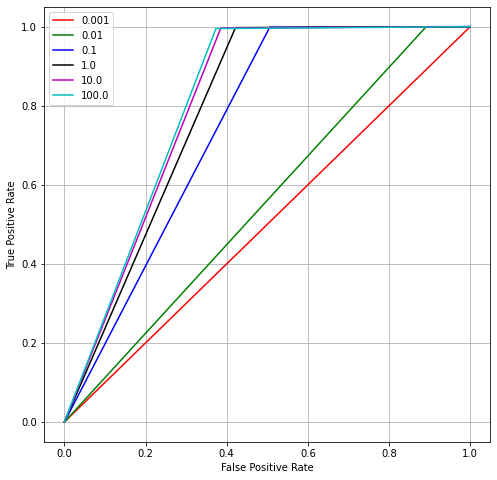

In [ ]:
colours=['r','g','b','k','m','c']
plt.figure(figsize = (8, 8))
for i in range(len(fpr_L2)):
    plt.plot(fpr_L2[i],tpr_L2[i],colours[i])
plt.gca().legend(df_log_L2['C'])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

In [ ]:
# Re-Obtain the best model with C=0.01
estimator_L2_best = LogisticRegression(solver = 'liblinear', max_iter=1000, random_state=2022, C=100,penalty='l2') 
estimator_L2_best.fit(X_train, Y_train)

# Obtain the features and their magnitude, then sorted by magnitide
df_L2_features = pd.DataFrame(data = {'Coefficient':estimator_L2_best.coef_.tolist()[0],'Feature_Name':vectorizer.get_feature_names()})
df_L2_features['Coefficient_Magnitude'] = abs(df_L2_features['Coefficient'])
df_L2_features.sort_values(by='Coefficient_Magnitude', ascending=False).head(10)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Coefficient,Feature_Name,Coefficient_Magnitude
8242,-3.666503,worst,3.666503
5642,-3.479044,rude,3.479044
255,3.277603,amazing,3.277603
872,-3.053858,avoid,3.053858
2333,3.026600,excellent,3.026600
1867,2.954878,delicious,2.954878
5222,-2.919360,poor,2.919360
882,-2.566507,awful,2.566507
6441,-2.548053,terrible,2.548053
6404,-2.520006,tasteless,2.520006


## L1 regularized Logistic Regression:

In [ ]:

col_labels = ['C', 'Train AUC','Model Complexity - Coef Sum','Test AUC']

log_L1=[]
fpr_L1=[]
tpr_L1=[]
def logistic_regression_L1(c_values):
  for c in c_values:
    log_L1_list=[]
    LR_model=LogisticRegression(solver='liblinear',max_iter=1000, random_state=2022, C=c, penalty='l1')
    LR_model.fit(X_train,Y_train)
    if(LR_model.classes_[1]==5):
      print('Selected positive class successfully')
    else:
      print('Selected positive class incorrectly')
    
    train_pred_probability=LR_model.predict(X_train)
    train_pred_probability_5=train_pred_probability
    train_AUC=roc_auc_score(Y_train,train_pred_probability_5)

    test_pred_probability=LR_model.predict(X_test)
    test_pred_probability_5=test_pred_probability
    test_AUC=roc_auc_score(Y_test,test_pred_probability_5)

    fpr,tpr,threshold=roc_curve(Y_test,test_pred_probability_5,pos_label=5)
    coef_sum=np.sum(np.abs(LR_model.coef_))

    print('C value:',c)
    print('Model Complexity:',coef_sum)
    print('Train AUC:', train_AUC)
    print('Test AUC:', test_AUC,'\n')

    log_L1_list=[c,train_AUC,coef_sum,test_AUC]
    log_L1.append(log_L1_list)
    fpr_L1.append(list(fpr))
    tpr_L1.append(list(tpr))
  df_of_log_L1=pd.DataFrame(log_L1,columns=col_labels)
  return df_of_log_L1

c_values=[0.001, 0.01, 0.1, 1, 10, 100] 
df_log_L1=logistic_regression_L1(c_values)

Selected positive class successfully
C value: 0.001
Model Complexity: 0.7208127611414042
Train AUC: 0.5
Test AUC: 0.5 

Selected positive class successfully
C value: 0.01
Model Complexity: 0.7471753337294194
Train AUC: 0.5
Test AUC: 0.5 

Selected positive class successfully
C value: 0.1
Model Complexity: 29.269935129728875
Train AUC: 0.6363399565712607
Test AUC: 0.6137499502493219 

Selected positive class successfully
C value: 1
Model Complexity: 270.0217772735349
Train AUC: 0.945273631840796
Test AUC: 0.7930570796636285 

Selected positive class successfully
C value: 10
Model Complexity: 735.1858096973094
Train AUC: 1.0
Test AUC: 0.8164455841298179 

Selected positive class successfully
C value: 100
Model Complexity: 1208.153060932997
Train AUC: 1.0
Test AUC: 0.8345178732864444 



Plot:

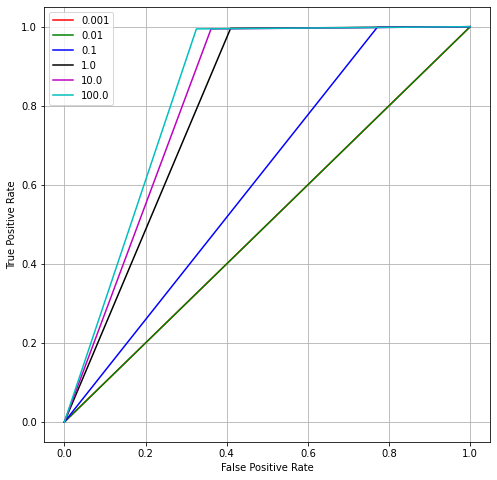

In [ ]:
colours=['r','g','b','k','m','c']
plt.figure(figsize = (8, 8))
for i in range(len(fpr_L1)):
    plt.plot(fpr_L1[i],tpr_L1[i],colours[i])
plt.gca().legend(df_log_L1['C'])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

In [ ]:
# Re-Obtain the best model with C=0.1
estimator_L1_best = LogisticRegression(solver = 'liblinear', max_iter=1000, random_state=2022, C=100,penalty='l1') 
estimator_L1_best.fit(X_train, Y_train)

# Obtain the features and their magnitude, then sorted by magnitide
df_L1_features = pd.DataFrame(data = {'Coefficient':estimator_L1_best.coef_.tolist()[0],'Feature_Name':vectorizer.get_feature_names()})
df_L1_features['Coefficient_Magnitude'] = abs(df_L1_features['Coefficient'])
df_L1_features.sort_values(by='Coefficient_Magnitude', ascending=False).head(10)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Coefficient,Feature_Name,Coefficient_Magnitude
8242,-14.023270,worst,14.023270
5642,-8.221406,rude,8.221406
882,-7.518995,awful,7.518995
6404,-7.424626,tasteless,7.424626
2003,-7.421044,disappointing,7.421044
2194,-7.083061,elsewhere,7.083061
255,7.013597,amazing,7.013597
6359,-6.925253,table more,6.925253
3101,-6.513759,great but,6.513759
5506,-6.422373,refused,6.422373
